In [22]:
import numpy as np
from sklearn.neural_network import BernoulliRBM
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import sem

In [2]:
def binarize(traces):
    stds = np.std(traces,axis=-1)
    out = np.zeros_like(traces)
    for i in range(traces.shape[0]):
        for j in range(traces.shape[1]):
            if traces[i,j]>stds[i]:
                out[i][j] = 1
            else:
                out[i][j] = 0

    return out


In [4]:
data = np.load('../../../data/raw_data/nike_calcium_trace.npy')
X = binarize(data).T

In [21]:
components = np.arange(1,21)
n_boot = 10
models = []
median_ll = []
for i in tqdm(components):
    boot_models = []
    boot_median_ll = []
    # performs fit n times, save performances and best model
    for b in range(n_boot):
        model = BernoulliRBM(n_components=i)
        model.fit(X)
        boot_models.append(model)
        scored_samples = model.score_samples(X)
        boot_median_ll.append(np.nanmedian(scored_samples))
    median_ll.append(boot_median_ll)
    models.append(boot_models[np.argmax(boot_median_ll)])

median_ll = np.asarray(median_ll)


100%|██████████| 20/20 [43:16<00:00, 129.82s/it]


<ErrorbarContainer object of 3 artists>

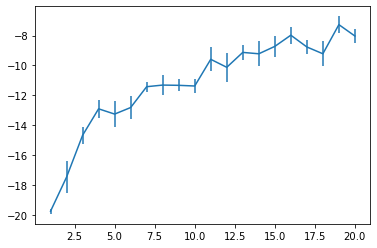

In [23]:
plt.errorbar(components,np.mean(median_ll,axis=1),yerr=sem(median_ll,axis=1))

<AxesSubplot:>

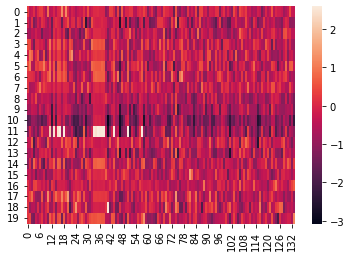

In [24]:
sns.heatmap(models[-1].components_)

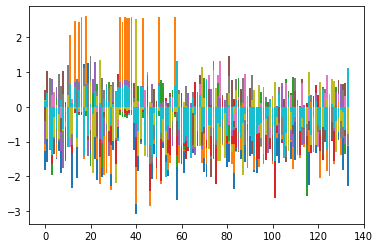

In [31]:
component_w = models[-1].components_
for i,w in enumerate(component_w):
    plt.bar(np.arange(len(w)),w)